<center> <H1> Two-colour STORM data </H1> </center>


                        *Code written by Timo Rey. Laboratory of Experimental Biophysics, EPFL*

                                            *Created for revisions in 2020*

#### Aims:
    To visualise two-colour STORM data.
#### Approach:
    see Workflow below

# Initialize libraries & functions

In [1]:
### Workflow:
# 1) for every FOV in dictionary [date[FOVs]]
#   2) for every roi in roi_df
#     3) make an overlay figure:
#       3.1) crop WF
#       3.2) display WF
#       3.3) for every cluster with roi_ID == i
#       3.4) plot locs with roi_ID == i and cluster_ID == j
#       3.5) calculate remaining cluster descriptors (FWHM)
#       3.6) add cluster-descriptor values and roi_ID and cluster_ID and FOV-date & number to 'out_df'
#       3.7) add relevant descriptors to plots
#       3.8) save plots
#     4) for each cluster with roi_ID == i
#       4.1) plot locs
#       4.2) plot Convex Hulls
#       4.3) add cluster-descriptor values [dist-CoM, %-overlay, Ecc, Diameter]
# 5) make summary-plots and statistics from out_df

In [2]:
#load libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
from statannot import add_stat_annotation
import PIL
from matplotlib.patches import Ellipse
from math import pi

In [3]:
# 0.1) create dictionary with all FOVs to analyse:
Dates = ['20181108', '20191212', '20200211', '20200219']
FOVs  = [[11],[2,3,5,7,8,12],[1,2],[9,10,12]]
# 0.2) specify common root-directory:
baseDir = "C:/Users/Public/Documents/03_Architecture/02_STORM_2C/"
outDir  = "C:/Users/Public/Documents/03_Architecture/02_STORM_2C/04_Analysis/"

In [4]:
# iterate through individual days
i=1
files = {Dates[i]: FOVs[i]}
files

{'20191212': [2, 3, 5, 7, 8, 12]}

testing roi 1
testing roi 2
There is a cluster! -> now treating k = 2
cluster_ID z is: 0
plotting cluster z: 0
testing roi 1
There is a cluster! -> now treating k = 1
cluster_ID z is: 0
plotting cluster z: 0
testing roi 2
There is a cluster! -> now treating k = 2
cluster_ID z is: 1
plotting cluster z: 1
testing roi 3
There is a cluster! -> now treating k = 3
cluster_ID z is: 2
plotting cluster z: 2
testing roi 4
There is a cluster! -> now treating k = 4
cluster_ID z is: 3
plotting cluster z: 3
testing roi 5
There is a cluster! -> now treating k = 5
cluster_ID z is: 4
plotting cluster z: 4
testing roi 1
There is a cluster! -> now treating k = 1
cluster_ID z is: 0
plotting cluster z: 0
testing roi 2
There is a cluster! -> now treating k = 2
cluster_ID z is: 1
plotting cluster z: 1
testing roi 1
There is a cluster! -> now treating k = 1
cluster_ID z is: 0
plotting cluster z: 0
testing roi 2
There is a cluster! -> now treating k = 2
cluster_ID z is: 1
plotting cluster z: 1
testing roi 1
Th

C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


plotting cluster z: 0


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


testing roi 2
There is a cluster! -> now treating k = 2
cluster_ID z is: 1


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


plotting cluster z: 1


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


testing roi 3
There is a cluster! -> now treating k = 3
cluster_ID z is: 2


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


plotting cluster z: 2


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


testing roi 4
testing roi 1
There is a cluster! -> now treating k = 1
cluster_ID z is: 0


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


cluster_ID z is: 1
plotting cluster z: 0


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


plotting cluster z: 1


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


testing roi 2
There is a cluster! -> now treating k = 2
cluster_ID z is: 2


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


cluster_ID z is: 3
plotting cluster z: 2


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


plotting cluster z: 3


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


testing roi 3
There is a cluster! -> now treating k = 3
cluster_ID z is: 4


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


plotting cluster z: 4


C:\Users\threy\miniconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


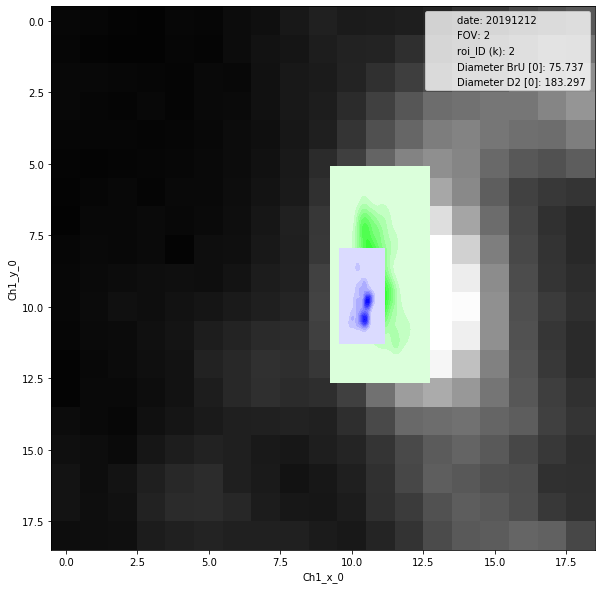

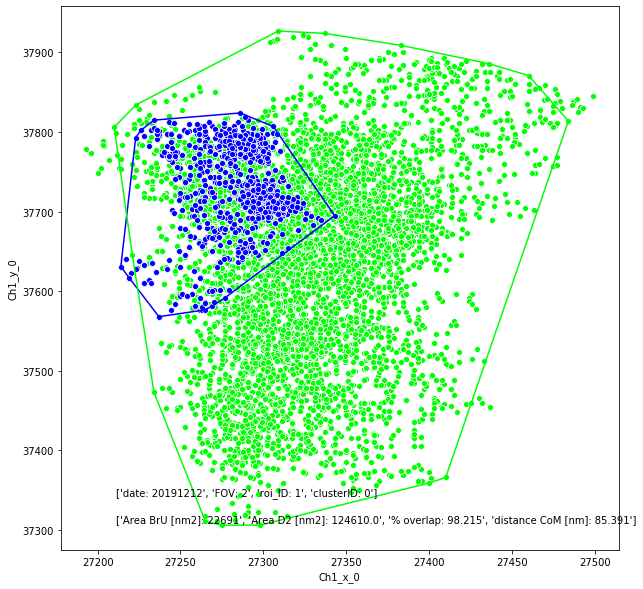

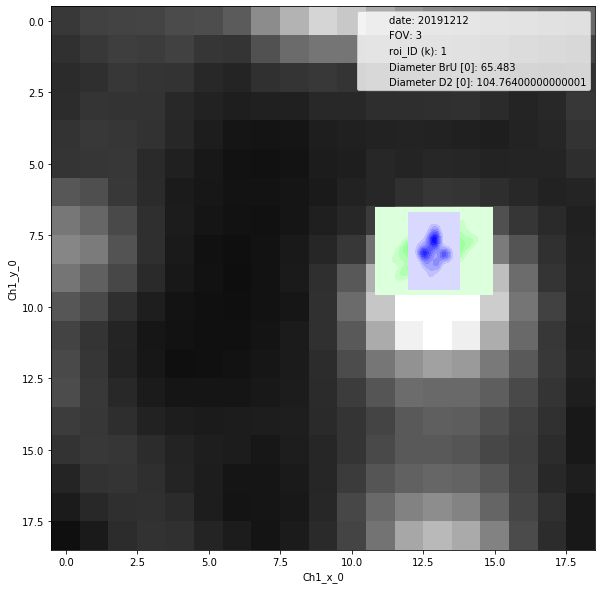

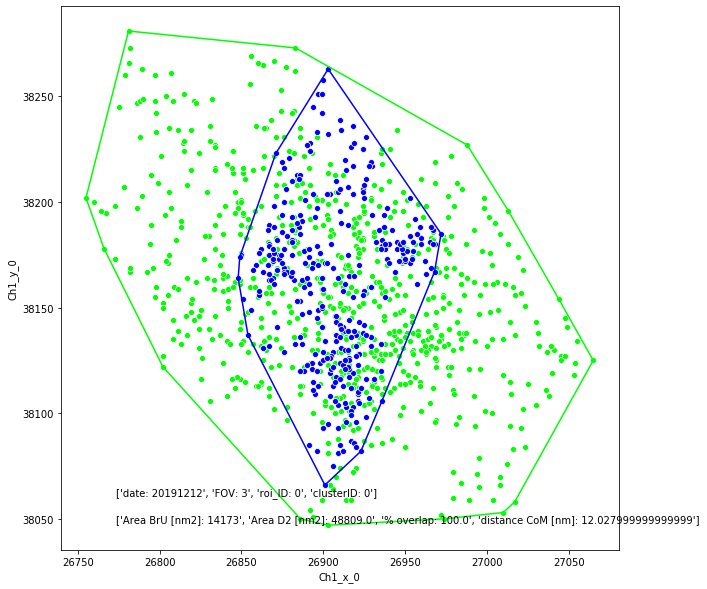

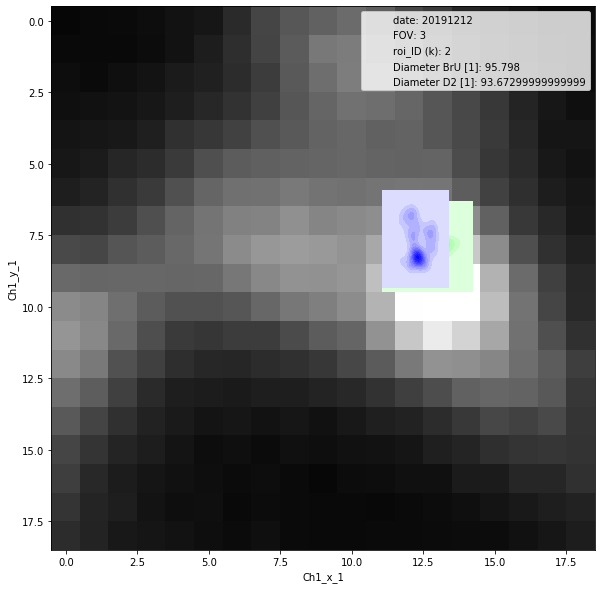

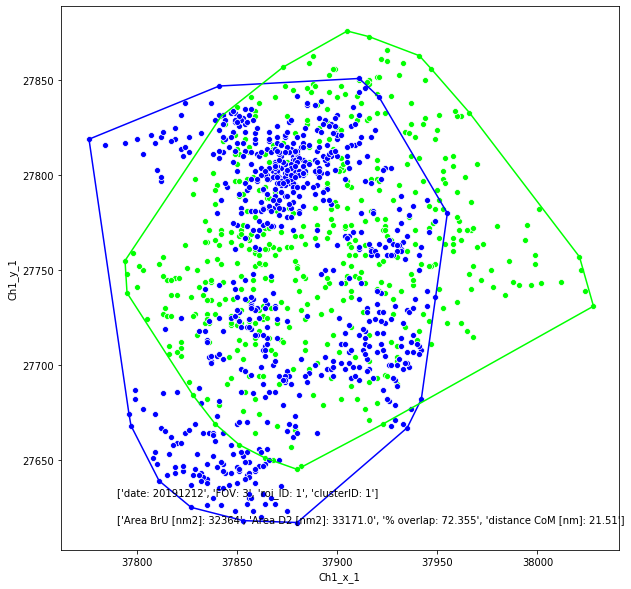

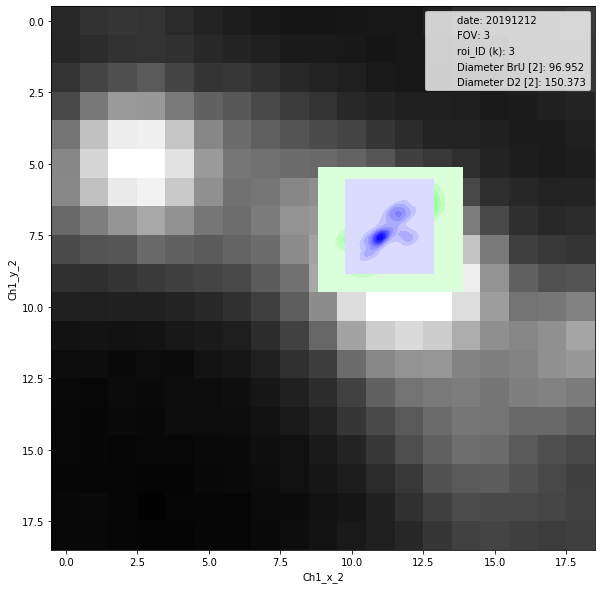

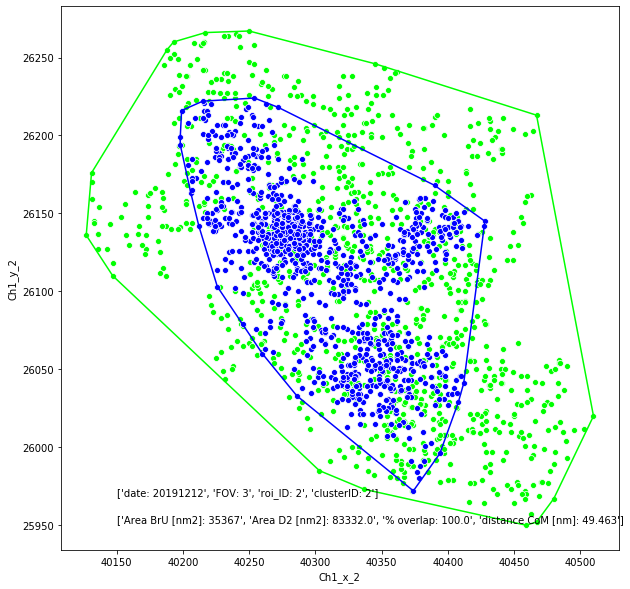

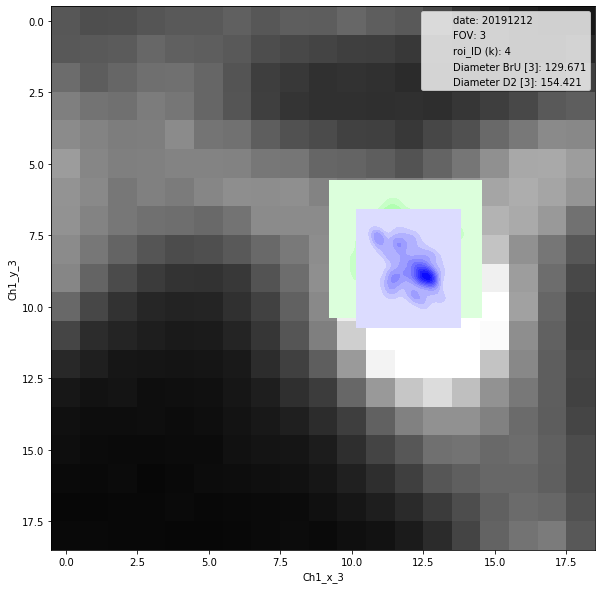

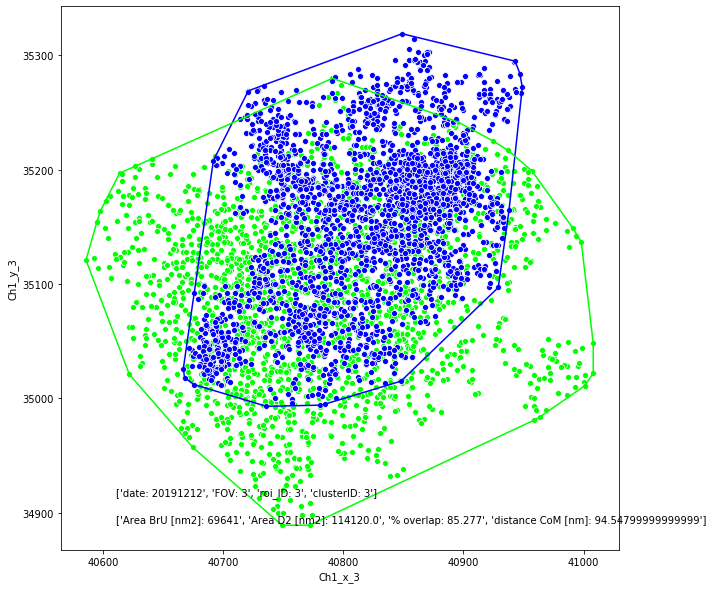

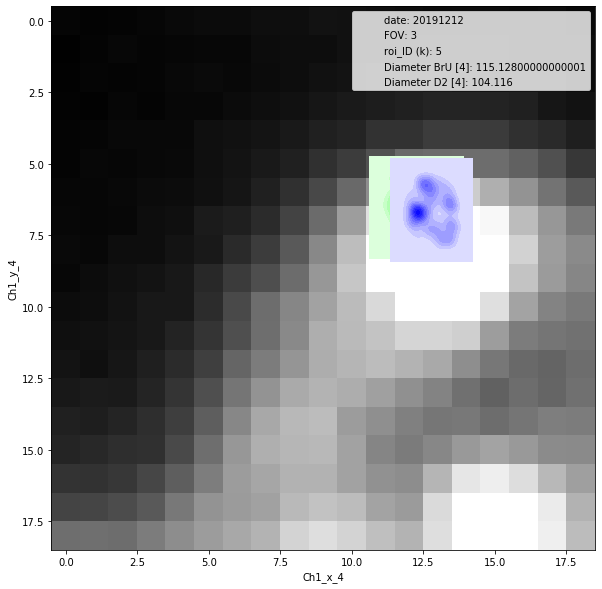

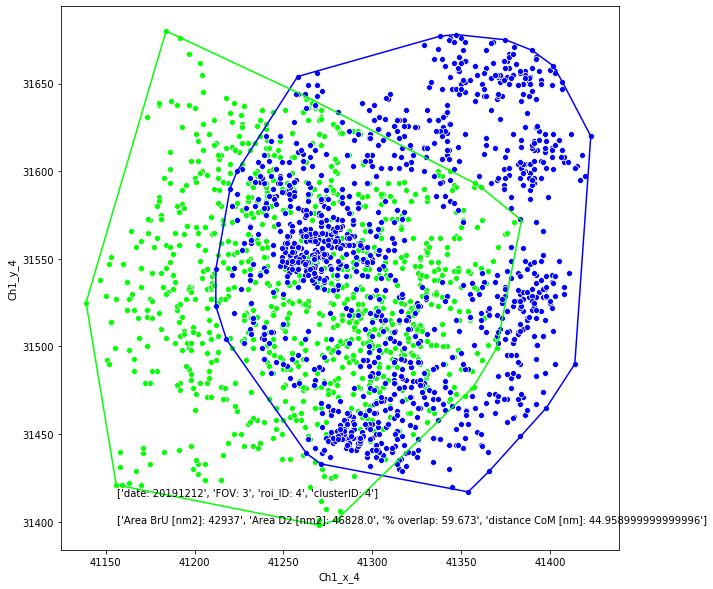

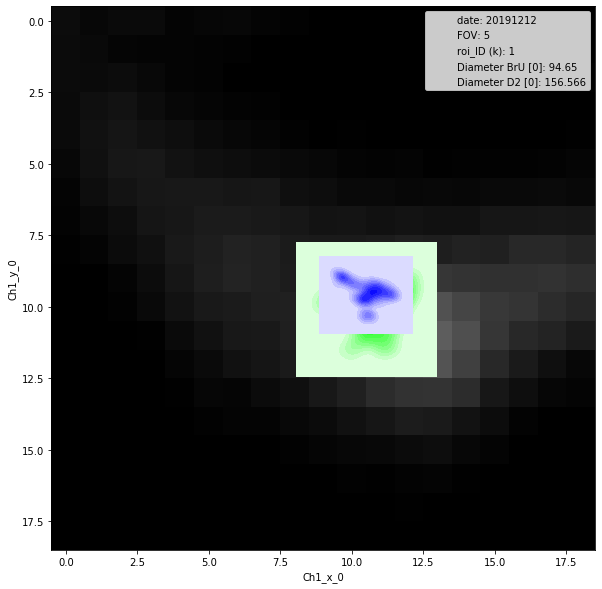

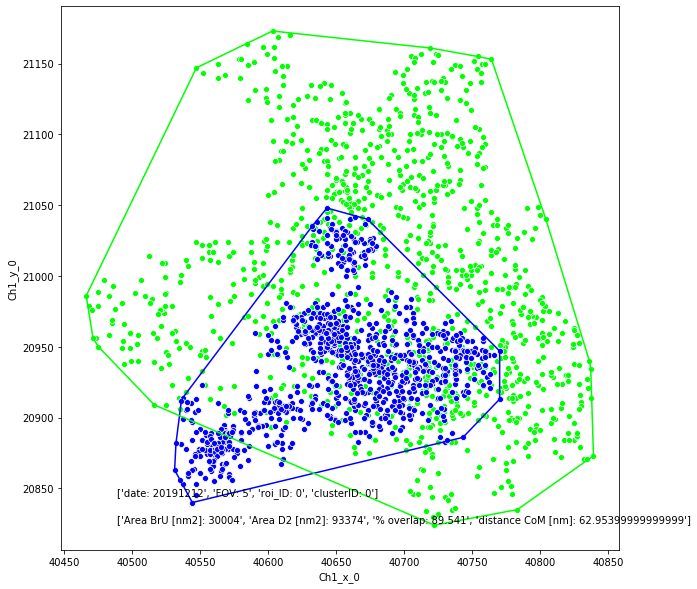

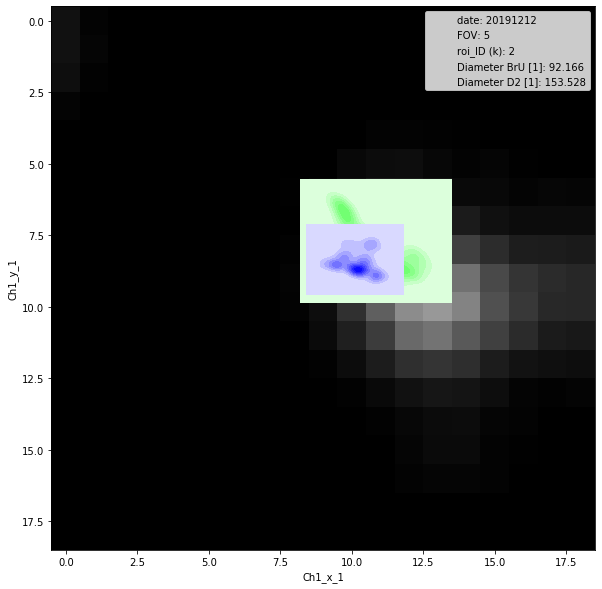

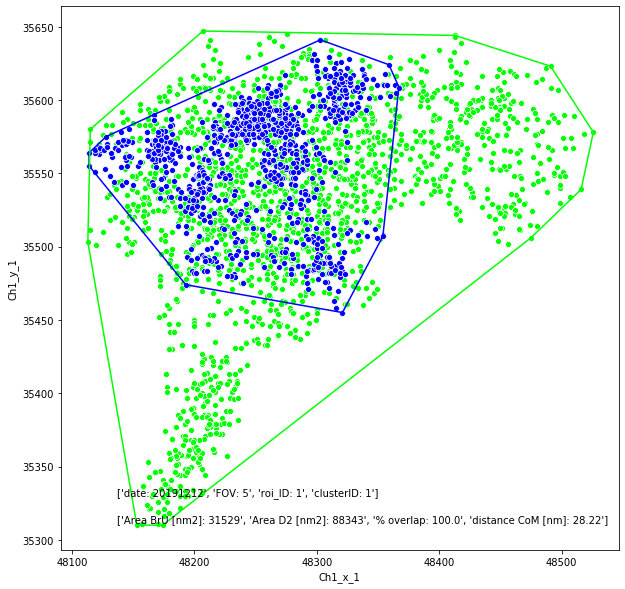

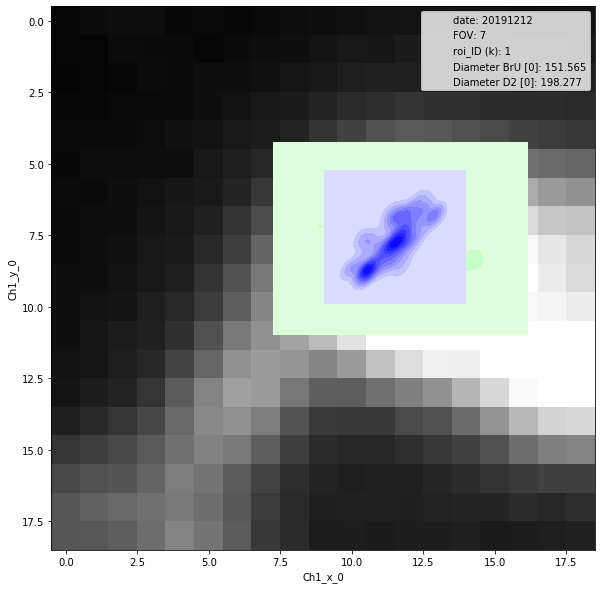

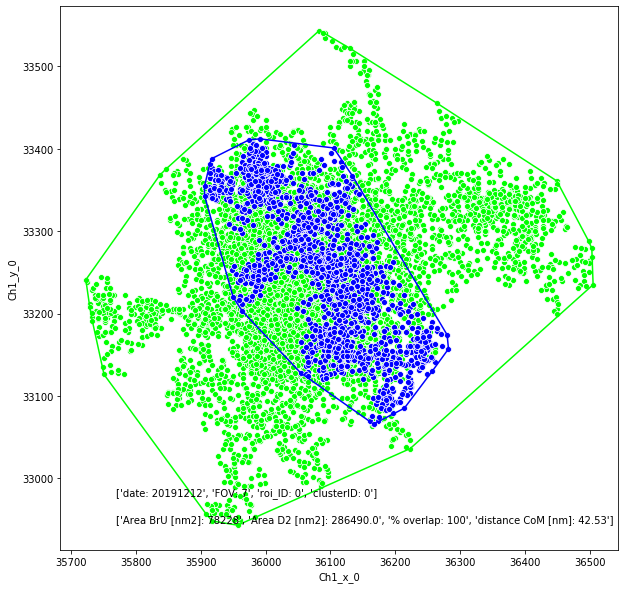

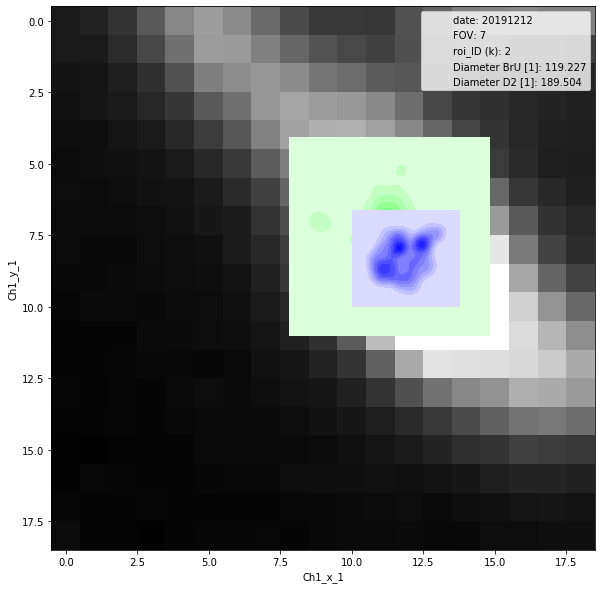

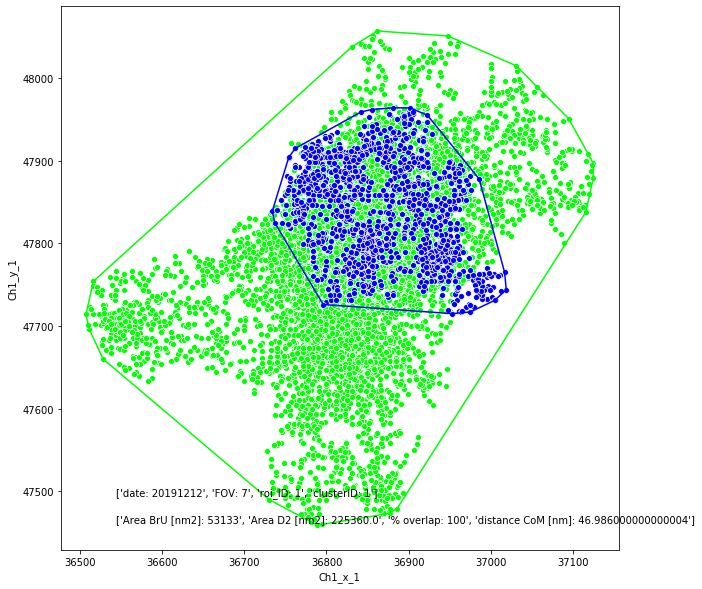

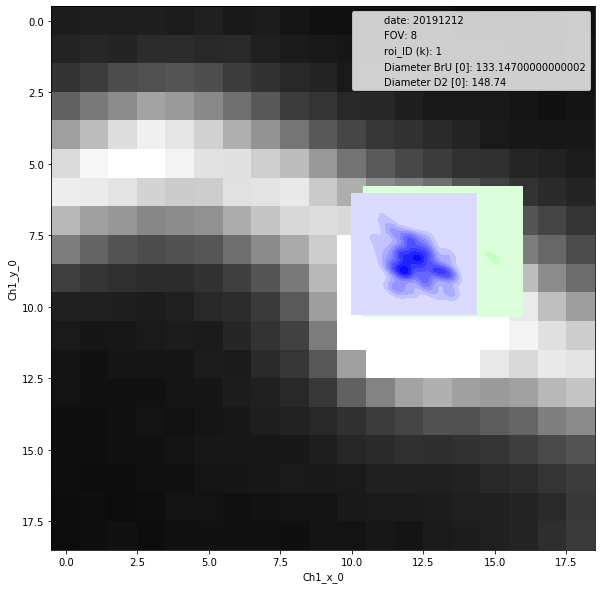

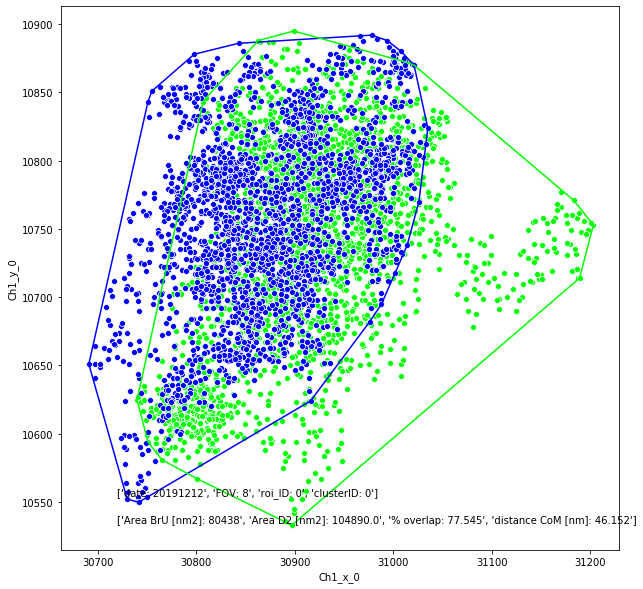

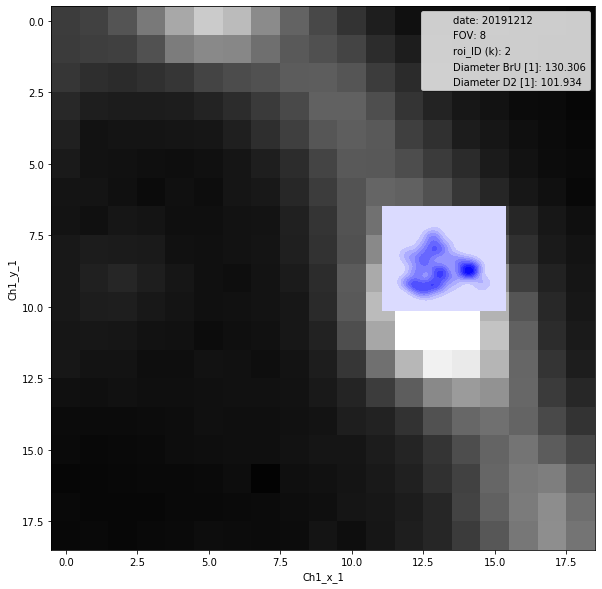

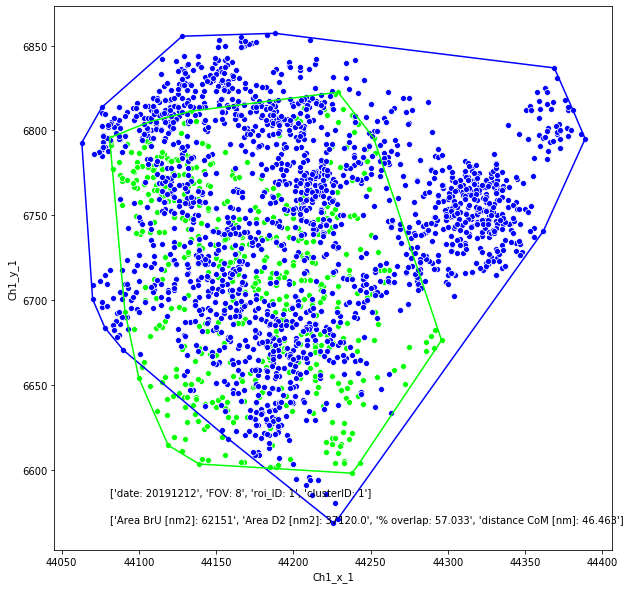

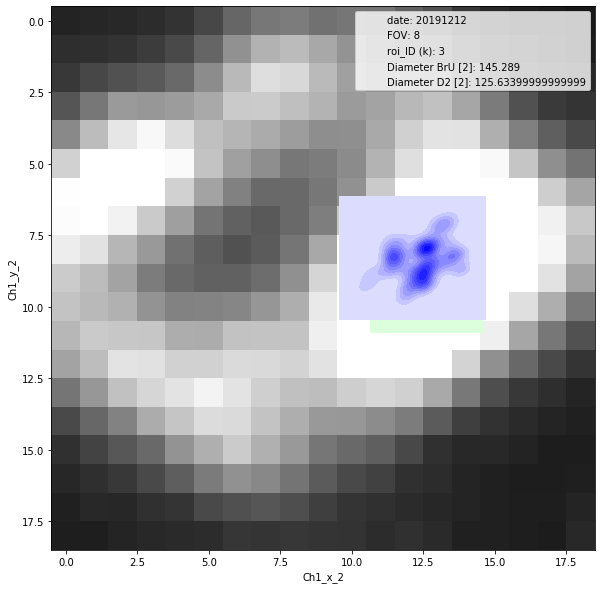

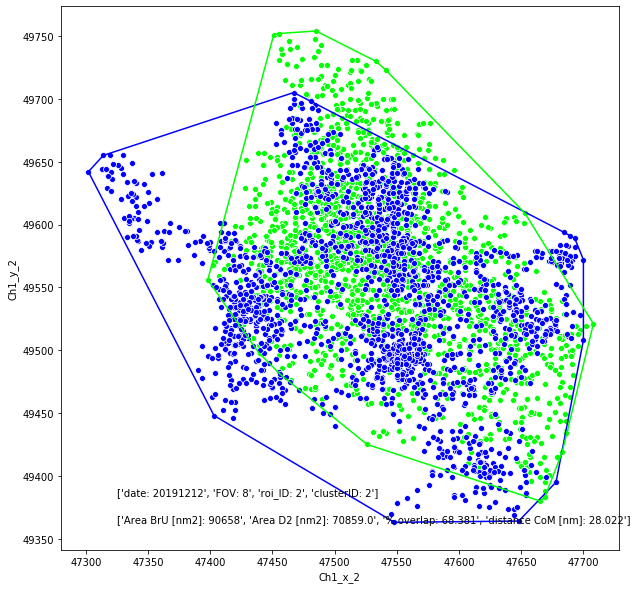

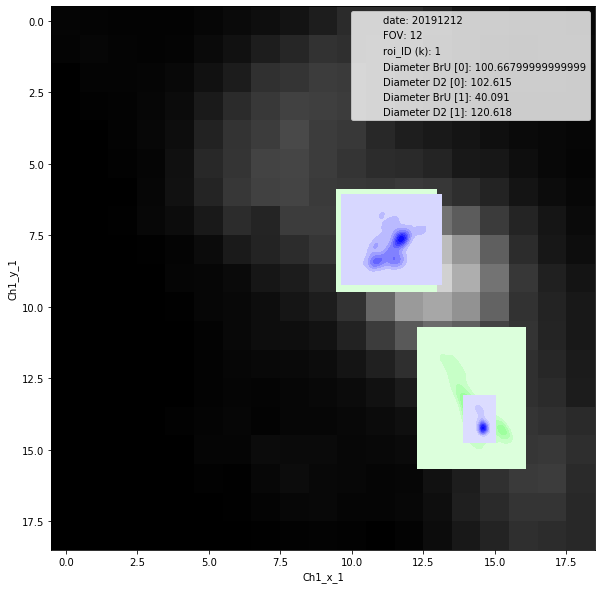

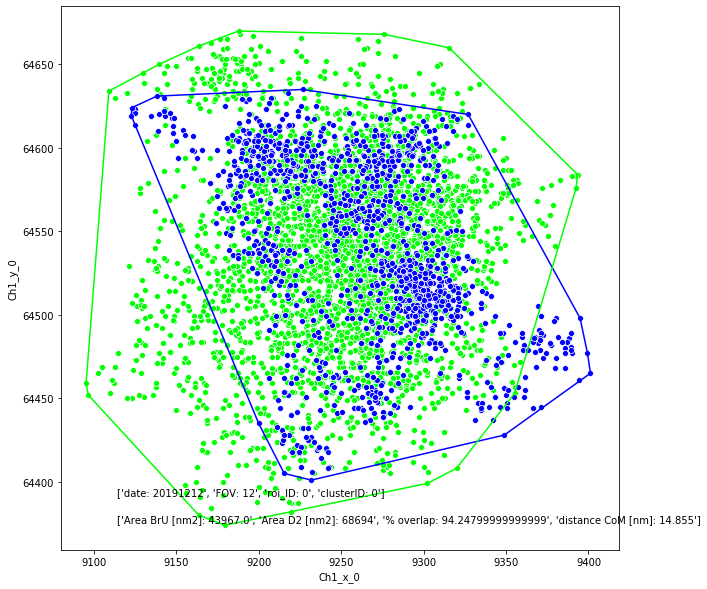

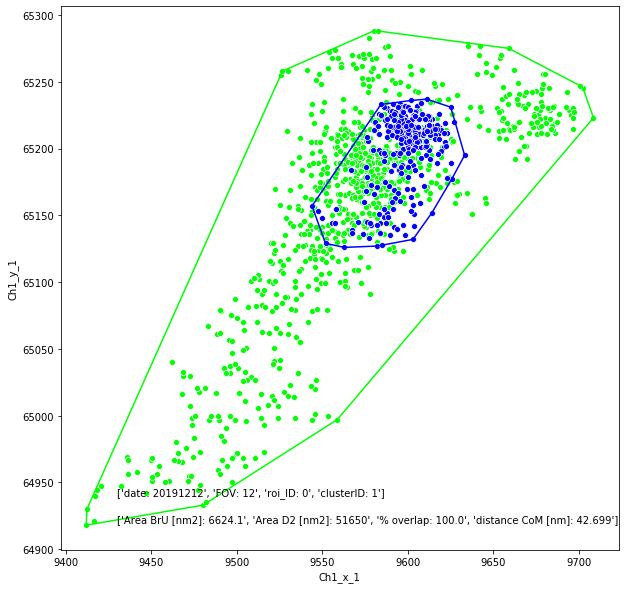

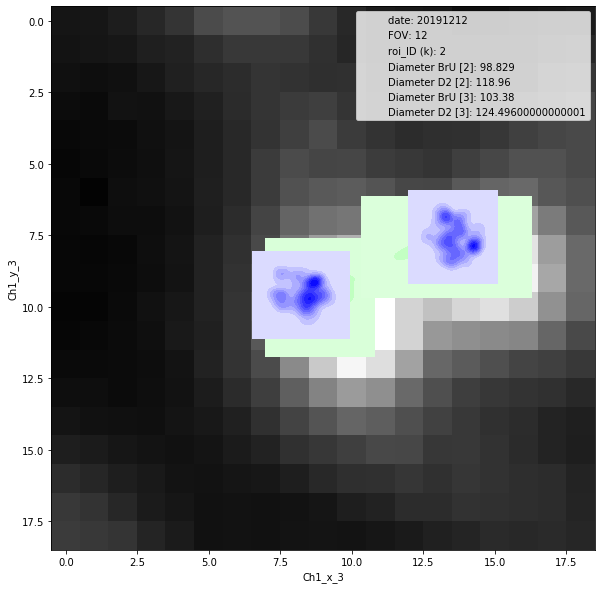

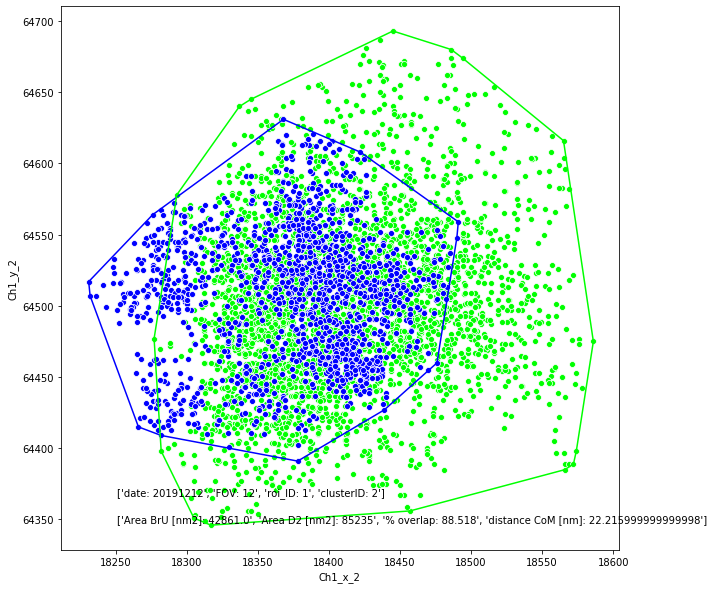

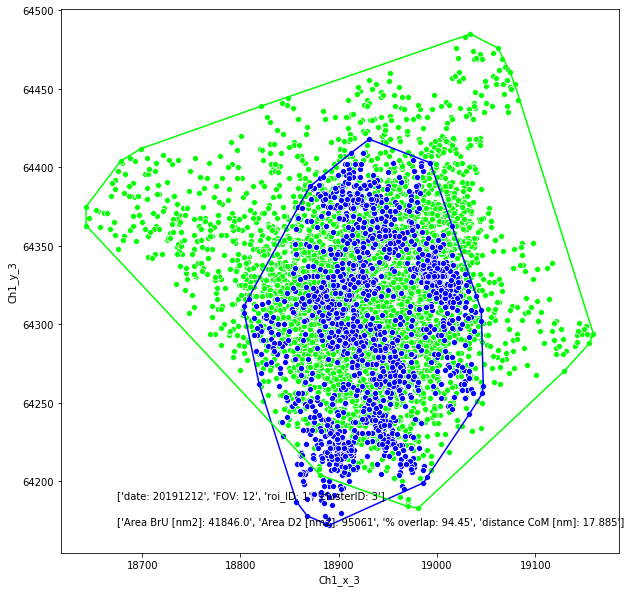

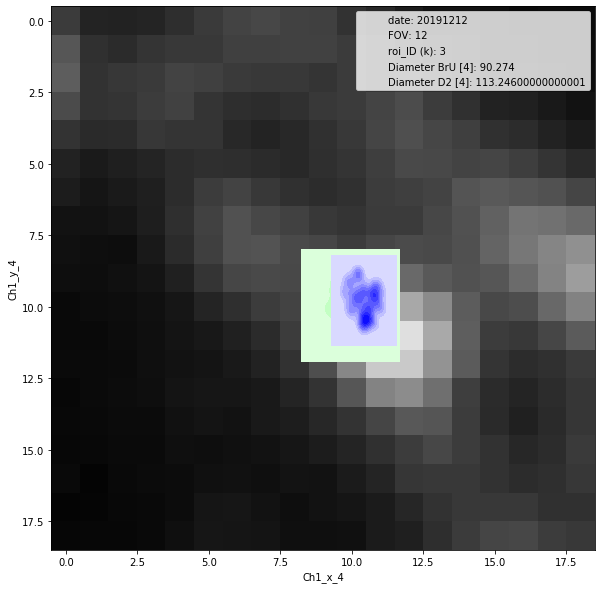

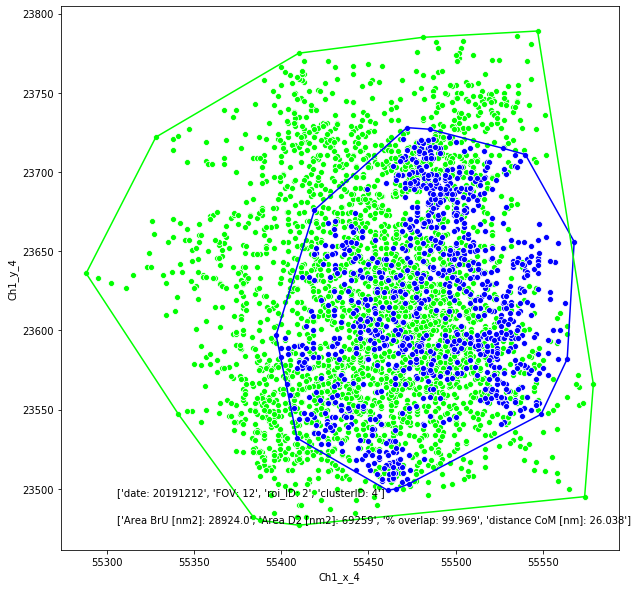

In [5]:
# 0.3) for every date in dictionary 'j':
for i in files:                                                      # for every day
# 1) For every FOV 'i', load data
    for j in files[str(i)]:                                          # for every FOV
# 1.1) load WF:
        wfDir        = baseDir+"01_rawData/WideField_images/"
        wfFile       = wfDir+str(i)+'_TR_COS7_D2-d755_WF'+str(j)+'/'+str(i)+'_TR_COS7_D2-d755_WF'+str(j)+'_MMStack_Pos0.ome.tif'
        wf_img       = plt.imread(wfFile)
# 1.2) load ROIs:
        roiDir       = baseDir+"03_processedData/Output/"
        roiFile      = roiDir+str(i)+'_TR_COS7_BrU-A647_FOV_'+str(j)+'_ROIsKept.csv'
        roi_df       = pd.read_csv(roiFile, sep = ',',names=["x", "y", "size"])
        # backtransform into pixels:
        roi_df['x_pxl'] = roi_df['x']/106 
        roi_df['y_pxl'] = roi_df['y']/106
# 1.3) load Localisations:
        locDir       = baseDir+"03_processedData/Output/"
        locFile      = locDir + str(i) + '_2C_COS7_FOV_' + str(j) + '/' + str(i) + '_TR_COS7_BrU-A647_FOV_' + str(j) + '_DBSCANned_Locs.csv'
        loc_df       = pd.read_csv(locFile, sep = ',', header = None)
        # rename the columns:
        columnNames  = []
        for z in range(0,int(len(loc_df.columns)/5)):
            columnNames = columnNames+['Ch1_x_'+str(z), 'Ch1_y_'+str(z), 'Ch2_x_'+str(z), 'Ch2_y_'+str(z), 'roiID_'+str(z)]
        loc_df.columns  = columnNames      
# 1.4) load cluster descriptors:
        clusterDir   = baseDir+"03_processedData/Output/"
        clusterFile  = locDir + str(i) + '_2C_COS7_FOV_' + str(j) + '/' + str(i) + '_TR_COS7_BrU-A647_FOV_' + str(j) + '_DBSCAN_filtered.csv'
        cluster_df   = pd.read_csv(clusterFile, sep = ',',names=['Rg_1', 'Ecc_1', 'Length_1', 'Width_1', 'ConvexHull_1', 'overlap [%]', 'Distance_CoM','Rg_2', 'Ecc_2', 'Length_2', 'Width_2', 'ConvexHull_2', 'roiID'])
        # Calculate remaining cluster descriptors:
        cluster_df['Diameter_1']             = (cluster_df['Length_1']+cluster_df['Width_1'])
        cluster_df['FWHM_1']                 = (cluster_df['Diameter_1']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma 
        cluster_df['Diameter_2']             = (cluster_df['Length_2']+cluster_df['Width_2'])
        cluster_df['FWHM_2']                 = (cluster_df['Diameter_2']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma
# 1.5) load Convex Hull descriptors
        hullDir       = baseDir+"03_processedData/Output/"
        hullFile      = locDir + str(i) + '_2C_COS7_FOV_' + str(j) + '/' + str(i) + '_TR_COS7_BrU-A647_FOV_' + str(j) + '_hullPoints.csv'
        hull_df       = pd.read_csv(hullFile, sep = ',', header = None)        #hull_df = 
        # rename the columns:
        columnNames  = []
        for z in range(0,int(len(hull_df.columns)/6)):
            columnNames = columnNames+['Ch1_x_'+str(z), 'Ch1_y_'+str(z), 'Ch2_x_'+str(z), 'Ch2_y_'+str(z), 'roiID_'+str(z), 'clusterID'+str(z)]
        hull_df.columns  = columnNames 
# 2) for every roi 'kk':
        for k,v in enumerate(roi_df['x']):
            kk = k+1                                                           # k+1 to account MATLAB-python conversion
# 2.1) check whether there are clusters:
            print("testing roi " + str(kk))
            if kk in cluster_df['roiID'].values:
                print("There is a cluster! -> now treating k = "+str(kk))

                
# 3) Make an overlay-figure:
        # 3.1) crop WF:
                x_coord = int(roi_df['x_pxl'][k])
                y_coord = int(roi_df['y_pxl'][k])
                size = roi_df['size'][k]+2
                wf_crop = wf_img[y_coord-size:y_coord+2, x_coord-size:x_coord+2]
#       3.2) display WF-crop:
                f, axes = plt.subplots(figsize = (10,10))
                plt.imshow(wf_crop, vmin=500, vmax=8000, cmap= 'gray')
                # make a legend:
                legendary = ["date: " + i, "FOV: " + str(j), "roi_ID (k): "+str(kk)]        
#       3.3) for every cluster 'z' with roi_ID == k
                for z,v in enumerate(cluster_df["roiID"]):
                    if v == kk:
                        print("cluster_ID z is: "+str(z))
#       3.4) plot locs with roi_ID == kk and cluster_ID == z
            # Get rid of the '0':
                        data1 = loc_df['Ch1_x_'+str(z)][loc_df['Ch1_x_'+str(z)]!=0]
                        data2 = loc_df['Ch1_y_'+str(z)][loc_df['Ch1_y_'+str(z)]!=0]
                        data3 = loc_df['Ch2_x_'+str(z)][loc_df['Ch2_x_'+str(z)]!=0]
                        data4 = loc_df['Ch2_y_'+str(z)][loc_df['Ch2_y_'+str(z)]!=0]
            # divide coordinates by pxl size
                        data11=data1/106
                        data22=data2/106
                        data33=data3/106
                        data44=data4/106
            # plot locs:
                        sns.kdeplot(data= data33-x_coord+size, data2= data44-y_coord+size, shade=1, color = 'lime', alpha = 1, cbar = 0)
                        sns.kdeplot(data= data11-x_coord+size, data2= data22-y_coord+size, shade=1, color = 'blue', alpha = 1, cbar = 0)
#       3.5) add relevant descriptors to plots:
                        legendary = legendary + ["Diameter BrU ["+str(z)+"]: " + str(cluster_df["Diameter_1"][z]),
                            "Diameter D2 ["+str(z)+"]: " + str(cluster_df["Diameter_2"][z])]
            # plot legend:
                axes.legend(legendary)
#       3.6) save plots
                plt.savefig(outDir+i+'_FOV'+str(j)+'_roi'+str(kk)+"_overlay.svg")
                plt.savefig(outDir+i+'_FOV'+str(j)+'_roi'+str(kk)+"_overlay.png")
        
        
# 4) Make figure with convex Hull:
#       4.1) for every cluster 'z'th cluster with roi_ID == k:
                for z,v in enumerate(cluster_df["roiID"]):
                    if v == kk:
                        print("plotting cluster z: "+str(z))
                
#           4.2) plot locs:
            # create figure instance:
                        f, axes = plt.subplots(figsize = (10,10))
            # Get rid of the '0':
                        data1 = loc_df['Ch1_x_'+str(z)][loc_df['Ch1_x_'+str(z)]!=0]
                        data2 = loc_df['Ch1_y_'+str(z)][loc_df['Ch1_y_'+str(z)]!=0]
                        data3 = loc_df['Ch2_x_'+str(z)][loc_df['Ch2_x_'+str(z)]!=0]
                        data4 = loc_df['Ch2_y_'+str(z)][loc_df['Ch2_y_'+str(z)]!=0]
            # plot locs:
                        sns.scatterplot(x= data3, y= data4, color = 'lime', alpha = 1)
                        sns.scatterplot(x= data1, y= data2, color = 'blue', alpha = 1)        
#           4.3) plot Convex Hulls:
            # Get rid of the '0':
                        hullx1 = hull_df['Ch1_x_'+str(z)][hull_df['Ch1_x_'+str(z)]!=0]
                        hully1 = hull_df['Ch1_y_'+str(z)][hull_df['Ch1_y_'+str(z)]!=0]
                        hullx2 = hull_df['Ch2_x_'+str(z)][hull_df['Ch2_x_'+str(z)]!=0]
                        hully2 = hull_df['Ch2_y_'+str(z)][hull_df['Ch2_y_'+str(z)]!=0]
                        plt.plot(hullx1, hully1, '-', color = 'blue')
                        plt.plot(hullx2, hully2, '-', color = 'lime')
#           4.4) add cluster-descriptor values [dist-CoM, %-overlay, Ecc, Diameter]:
                        legendary2 = ["date: " + i, "FOV: " + str(j), "roi_ID: "+str(k),"clusterID: "+str(z)]
                        legendary3 = ["Area BrU [nm2]: " + str(cluster_df["ConvexHull_1"][z]),
                                             "Area D2 [nm2]: " + str(cluster_df["ConvexHull_2"][z]),
                                             "% overlap: " + str(cluster_df["overlap [%]"][z]*100),
                                             "distance CoM [nm]: " + str(cluster_df["Distance_CoM"][z])] 
                        axes.text(0.1,0.1,legendary2,transform=axes.transAxes)
                        axes.text(0.1,0.05,legendary3,transform=axes.transAxes)
#           4.5) save plot:
                        plt.savefig(outDir+i+'_FOV'+str(j)+'_roi'+str(kk)+'_'+str(z)+"_hullplot.svg")
                        plt.savefig(outDir+i+'_FOV'+str(j)+'_roi'+str(kk)+'_'+str(z)+"_hullplot.png") 

### because of naming-mismatch in 2018:

In [6]:
# iterate through individual files
files = {Dates[0]: FOVs[0]}
files

{'20181108': [11]}

testing roi 1
There is a cluster! -> now treating k = 1
cluster_ID z is: 0
cluster_ID z is: 1
plotting cluster z: 0
plotting cluster z: 1
testing roi 2
There is a cluster! -> now treating k = 2
cluster_ID z is: 2
plotting cluster z: 2


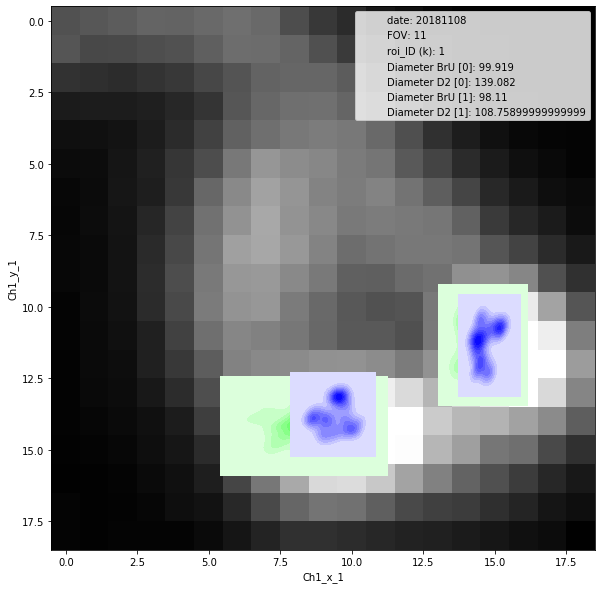

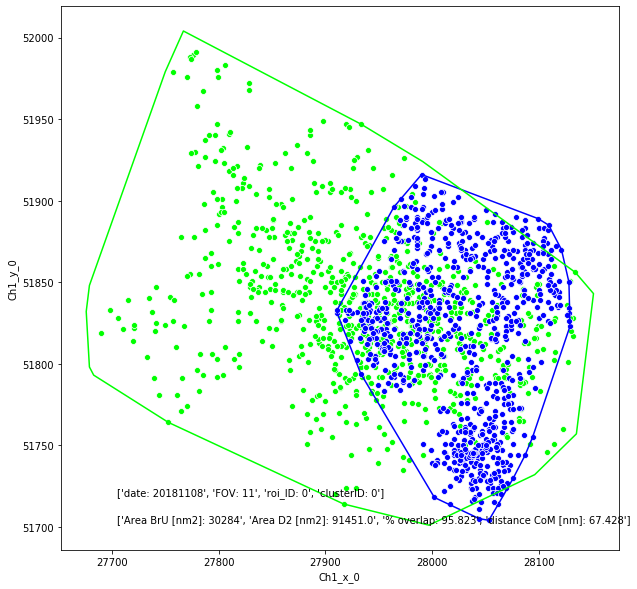

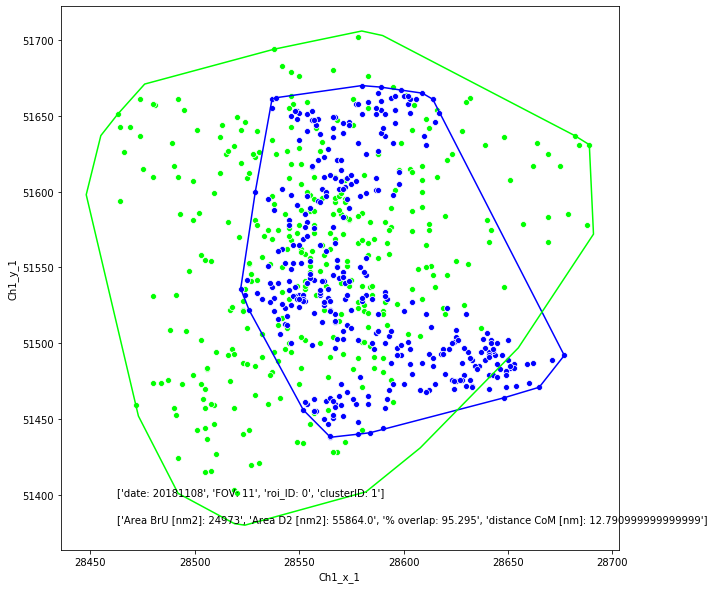

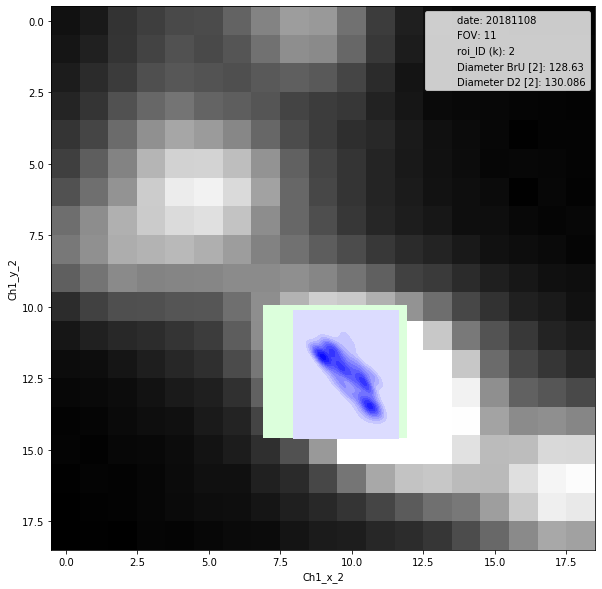

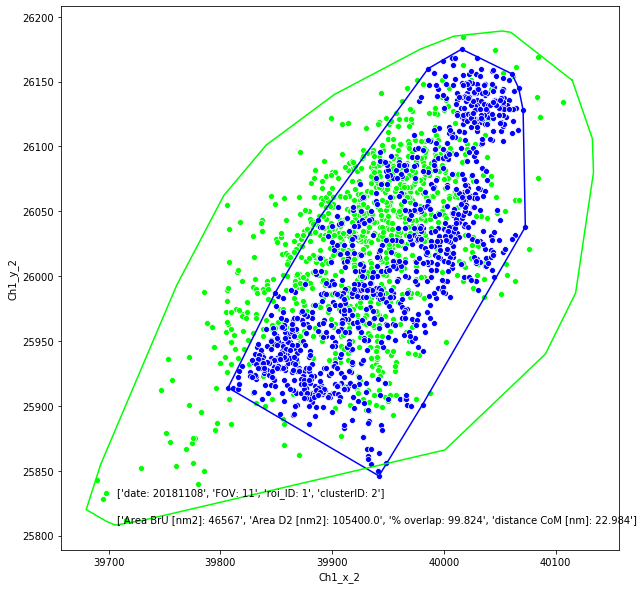

In [7]:
# 0.3) for every date in dictionary 'j':
for i in files:                                                      # for every day
# 1) For every FOV 'i', load data
    for j in files[str(i)]:                                          # for every FOV
# 1.1) load WF:
        wfDir        = wfDir
        wfFile       = wfDir+str(i)+'_COS7_D2-d755_WF'+str(j)+'/'+str(i)+'_COS7_D2-d755_WF'+str(j)+'_MMStack_Pos0.ome.tif'
        wf_img       = plt.imread(wfFile)
# 1.2) load ROIs:
        roiDir       = roiDir
        roiFile      = roiDir+str(i)+'_COS7_BrU-A647_FOV_'+str(j)+'_ROIsKept.csv'
        roi_df       = pd.read_csv(roiFile, sep = ',',names=["x", "y", "size"])
        # backtransform into pixels:
        roi_df['x_pxl'] = roi_df['x']/106 
        roi_df['y_pxl'] = roi_df['y']/106
# 1.3) load Localisations:
        locDir       = locDir
        locFile      = locDir + str(i) + '_2C_COS7_FOV_' + str(j) + '/' + str(i) + '_COS7_BrU-A647_FOV_' + str(j) + '_DBSCANned_Locs.csv'
        loc_df       = pd.read_csv(locFile, sep = ',', header = None)
        # rename the columns:
        columnNames  = []
        for z in range(0,int(len(loc_df.columns)/5)):
            columnNames = columnNames+['Ch1_x_'+str(z), 'Ch1_y_'+str(z), 'Ch2_x_'+str(z), 'Ch2_y_'+str(z), 'roiID_'+str(z)]
        loc_df.columns  = columnNames      
# 1.4) load cluster descriptors:
        clusterDir   = clusterDir
        clusterFile  = locDir + str(i) + '_2C_COS7_FOV_' + str(j) + '/' + str(i) + '_COS7_BrU-A647_FOV_' + str(j) + '_DBSCAN_filtered.csv'
        cluster_df   = pd.read_csv(clusterFile, sep = ',',names=['Rg_1', 'Ecc_1', 'Length_1', 'Width_1', 'ConvexHull_1', 'overlap [%]', 'Distance_CoM','Rg_2', 'Ecc_2', 'Length_2', 'Width_2', 'ConvexHull_2', 'roiID'])
        # Calculate remaining cluster descriptors:
        cluster_df['Diameter_1']             = (cluster_df['Length_1']+cluster_df['Width_1'])
        cluster_df['FWHM_1']                 = (cluster_df['Diameter_1']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma 
        cluster_df['Diameter_2']             = (cluster_df['Length_2']+cluster_df['Width_2'])
        cluster_df['FWHM_2']                 = (cluster_df['Diameter_2']*math.sqrt(2*math.log(2))) #calc. average FWHM from average sigma
# 1.5) load Convex Hull descriptors
        hullDir       = baseDir+"Output/"
        hullFile      = locDir + str(i) + '_2C_COS7_FOV_' + str(j) + '/' + str(i) + '_COS7_BrU-A647_FOV_' + str(j) + '_hullPoints.csv'
        hull_df       = pd.read_csv(hullFile, sep = ',', header = None)        #hull_df = 
        # rename the columns:
        columnNames  = []
        for z in range(0,int(len(hull_df.columns)/6)):
            columnNames = columnNames+['Ch1_x_'+str(z), 'Ch1_y_'+str(z), 'Ch2_x_'+str(z), 'Ch2_y_'+str(z), 'roiID_'+str(z), 'clusterID'+str(z)]
        hull_df.columns  = columnNames 
# 2) for every roi 'kk':
        for k,v in enumerate(roi_df['x']):
            kk = k+1                                                           # k+1 to account MATLAB-python conversion
# 2.1) check whether there are clusters:
            print("testing roi " + str(kk))
            if kk in cluster_df['roiID'].values:
                print("There is a cluster! -> now treating k = "+str(kk))
                
# 3) Make an overlay-figure:
        # 3.1) crop WF:
                x_coord = int(roi_df['x_pxl'][k])
                y_coord = int(roi_df['y_pxl'][k])
                size = roi_df['size'][k]+2
                wf_crop = wf_img[y_coord-size:y_coord+2, x_coord-size:x_coord+2]
#       3.2) display WF-crop:
                f, axes = plt.subplots(figsize = (10,10))
                plt.imshow(wf_crop, vmin=500, vmax=8000, cmap= 'gray')
                # make a legend:
                legendary = ["date: " + i, "FOV: " + str(j), "roi_ID (k): "+str(kk)]        
#       3.3) for every cluster 'z' with roi_ID == k
                for z,v in enumerate(cluster_df["roiID"]):
                    if v == kk:
                        print("cluster_ID z is: "+str(z))
#       3.4) plot locs with roi_ID == kk and cluster_ID == z
            # Get rid of the '0':
                        data1 = loc_df['Ch1_x_'+str(z)][loc_df['Ch1_x_'+str(z)]!=0]
                        data2 = loc_df['Ch1_y_'+str(z)][loc_df['Ch1_y_'+str(z)]!=0]
                        data3 = loc_df['Ch2_x_'+str(z)][loc_df['Ch2_x_'+str(z)]!=0]
                        data4 = loc_df['Ch2_y_'+str(z)][loc_df['Ch2_y_'+str(z)]!=0]
            # divide coordinates by pxl size
                        data11=data1/106
                        data22=data2/106
                        data33=data3/106
                        data44=data4/106
            # plot locs:
                        sns.kdeplot(data= data33-x_coord+size, data2= data44-y_coord+size, shade=1, color = 'lime', alpha = 1, cbar = 0)
                        sns.kdeplot(data= data11-x_coord+size, data2= data22-y_coord+size, shade=1, color = 'blue', alpha = 1, cbar = 0)
#       3.5) add relevant descriptors to plots:
                        legendary = legendary + ["Diameter BrU ["+str(z)+"]: " + str(cluster_df["Diameter_1"][z]),
                            "Diameter D2 ["+str(z)+"]: " + str(cluster_df["Diameter_2"][z])]
            # plot legend:
                axes.legend(legendary)
#       3.6) save plots
                plt.savefig(outDir+i+'_FOV'+str(j)+'_roi'+str(kk)+"_overlay.svg")
                #plt.savefig(outDir+i+'_FOV'+str(j)+'_roi'+str(kk)+"_overlay.png")
        
# 4) Make figure with convex Hull:
#       4.1) for every cluster 'z'th cluster with roi_ID == k:
                for z,v in enumerate(cluster_df["roiID"]):
                    if v == kk:
                        print("plotting cluster z: "+str(z))
                
#           4.2) plot locs:
            # create figure instance:
                        f, axes = plt.subplots(figsize = (10,10))
            # Get rid of the '0':
                        data1 = loc_df['Ch1_x_'+str(z)][loc_df['Ch1_x_'+str(z)]!=0]
                        data2 = loc_df['Ch1_y_'+str(z)][loc_df['Ch1_y_'+str(z)]!=0]
                        data3 = loc_df['Ch2_x_'+str(z)][loc_df['Ch2_x_'+str(z)]!=0]
                        data4 = loc_df['Ch2_y_'+str(z)][loc_df['Ch2_y_'+str(z)]!=0]
            # plot locs:
                        sns.scatterplot(x= data3, y= data4, color = 'lime', alpha = 1)
                        sns.scatterplot(x= data1, y= data2, color = 'blue', alpha = 1)        
#           4.3) plot Convex Hulls:
            # Get rid of the '0':
                        hullx1 = hull_df['Ch1_x_'+str(z)][hull_df['Ch1_x_'+str(z)]!=0]
                        hully1 = hull_df['Ch1_y_'+str(z)][hull_df['Ch1_y_'+str(z)]!=0]
                        hullx2 = hull_df['Ch2_x_'+str(z)][hull_df['Ch2_x_'+str(z)]!=0]
                        hully2 = hull_df['Ch2_y_'+str(z)][hull_df['Ch2_y_'+str(z)]!=0]
                        plt.plot(hullx1, hully1, '-', color = 'blue')
                        plt.plot(hullx2, hully2, '-', color = 'lime')
#           4.4) add cluster-descriptor values [dist-CoM, %-overlay, Ecc, Diameter]:
                        legendary2 = ["date: " + i, "FOV: " + str(j), "roi_ID: "+str(k),"clusterID: "+str(z)]
                        legendary3 = ["Area BrU [nm2]: " + str(cluster_df["ConvexHull_1"][z]),
                                             "Area D2 [nm2]: " + str(cluster_df["ConvexHull_2"][z]),
                                             "% overlap: " + str(cluster_df["overlap [%]"][z]*100),
                                             "distance CoM [nm]: " + str(cluster_df["Distance_CoM"][z])] 
                        axes.text(0.1,0.1,legendary2,transform=axes.transAxes)
                        axes.text(0.1,0.05,legendary3,transform=axes.transAxes)
#           4.5) save plot:
                        plt.savefig(outDir+i+'_FOV'+str(j)+'_roi'+str(kk)+'_'+str(z)+"_hullplot.svg")
                        #plt.savefig(outDir+i+'_FOV'+str(j)+'_roi'+str(kk)+'_'+str(z)+"_hullplot.png") 

In [8]:
### Workflow:
# 1) for every FOV in dictionary [date[FOVs]]
#   2) for every roi in roi_df
#     3) make an overlay figure:
#       3.1) crop WF
#       3.2) display WF
#       3.3) for every cluster with roi_ID == i
#       3.4) plot locs with roi_ID == i and cluster_ID == j
#       3.5) calculate remaining cluster descriptors (FWHM)
#       3.6) add cluster-descriptor values and roi_ID and cluster_ID and FOV-date & number to 'out_df'
#       3.7) add relevant descriptors to plots
#       3.8) save plots
#     4) for each cluster with roi_ID == i
#       4.1) plot locs
#       4.2) plot Convex Hulls
#       4.3) add cluster-descriptor values [dist-CoM, %-overlay, Ecc, Diameter]
# 5) make summary-plots and statistics from out_df